In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-45.38247455338245 -156.9441349302682
-9.83424296888957 101.91667581176961
40.525342521849524 179.9076926333529
31.13816750986456 -39.648263929186015
64.0433538838895 -116.03353984990997
88.06941877641927 53.933248715507915
-83.75446281310299 78.76055159741117
73.91371674620174 -76.13328777049088
-2.3049444623562465 168.94911658245792
48.394971858468665 -142.1402713066558
-83.01061866116174 -109.36017942746946
78.50867177851018 33.58140582509213
39.159254276939464 156.81625836614006
64.33679830197565 -69.10201252232795
-15.34319872191891 62.510451563954234
-89.42863825740959 -158.31291027954188
40.47883981205845 -165.38763658398688
51.28394646015977 -132.0111123485828
-51.21636262173793 -55.96438845799197
16.921985324550107 129.83390316861488
-85.08350277974225 4.82164301188709
-54.175233534021416 125.39455787064765
58.79090765701409 -100.00385221924331
7.726915682951983 -59.86421322463484
-2.86849257224128 119.21163229561864
-61.01681754427479 52.71055370443142
-72.88157735013542 -170

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

587

In [9]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | labuhan
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 10 of Set 1 | sitka
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | vardo
Processing Record 13 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | grand gaube
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | prince rupert
Processing Record 18 of Set 1 | rawson
Processing Record 19 of Set 1 | gigmoto
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 

Processing Record 33 of Set 4 | katsuura
Processing Record 34 of Set 4 | husavik
Processing Record 35 of Set 4 | naze
Processing Record 36 of Set 4 | wanning
Processing Record 37 of Set 4 | bati
Processing Record 38 of Set 4 | adeje
Processing Record 39 of Set 4 | chateauroux
Processing Record 40 of Set 4 | narsaq
Processing Record 41 of Set 4 | umm kaddadah
Processing Record 42 of Set 4 | nampa
Processing Record 43 of Set 4 | san cristobal
Processing Record 44 of Set 4 | yumen
Processing Record 45 of Set 4 | airai
Processing Record 46 of Set 4 | vao
Processing Record 47 of Set 4 | san-pedro
Processing Record 48 of Set 4 | high level
Processing Record 49 of Set 4 | markova
Processing Record 50 of Set 4 | qaqortoq
Processing Record 1 of Set 5 | bojnurd
Processing Record 2 of Set 5 | henties bay
Processing Record 3 of Set 5 | beibei
Processing Record 4 of Set 5 | salta
Processing Record 5 of Set 5 | mackay
Processing Record 6 of Set 5 | oistins
Processing Record 7 of Set 5 | kirakira
Pro

Processing Record 27 of Set 8 | xiongzhou
Processing Record 28 of Set 8 | chulman
Processing Record 29 of Set 8 | iskateley
Processing Record 30 of Set 8 | beringovskiy
Processing Record 31 of Set 8 | guozhen
Processing Record 32 of Set 8 | zonguldak
Processing Record 33 of Set 8 | karasjok
Processing Record 34 of Set 8 | manica
Processing Record 35 of Set 8 | sarkand
Processing Record 36 of Set 8 | kusti
Processing Record 37 of Set 8 | tabuk
Processing Record 38 of Set 8 | vallenar
Processing Record 39 of Set 8 | dawei
Processing Record 40 of Set 8 | faanui
Processing Record 41 of Set 8 | belmonte
Processing Record 42 of Set 8 | thinadhoo
Processing Record 43 of Set 8 | the valley
Processing Record 44 of Set 8 | mount gambier
Processing Record 45 of Set 8 | clyde river
Processing Record 46 of Set 8 | atasu
Processing Record 47 of Set 8 | kochevo
Processing Record 48 of Set 8 | udachnyy
Processing Record 49 of Set 8 | hit
Processing Record 50 of Set 8 | porto novo
Processing Record 1 o

Processing Record 21 of Set 12 | veraval
Processing Record 22 of Set 12 | mananjary
Processing Record 23 of Set 12 | pacific grove
Processing Record 24 of Set 12 | borba
Processing Record 25 of Set 12 | talaya
Processing Record 26 of Set 12 | sudak
Processing Record 27 of Set 12 | wewak
Processing Record 28 of Set 12 | ouadda
Processing Record 29 of Set 12 | chamalieres
Processing Record 30 of Set 12 | ekhabi
Processing Record 31 of Set 12 | jiwani
Processing Record 32 of Set 12 | beisfjord
Processing Record 33 of Set 12 | manicore
Processing Record 34 of Set 12 | taoudenni
Processing Record 35 of Set 12 | adelaide
Processing Record 36 of Set 12 | ola
Processing Record 37 of Set 12 | peleduy
-----------------------------
Data Retrieval Complete      
-----------------------------


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,49.48,88,100,2.06,NZ,2022-05-12 14:39:15
1,Labuhan,-6.8844,112.2051,80.31,84,42,0.27,ID,2022-05-12 14:43:08
2,Nikolskoye,59.7035,30.7861,49.87,96,100,8.25,RU,2022-05-12 14:40:30
3,Ribeira Grande,38.5167,-28.7000,63.00,59,75,11.50,PT,2022-05-12 14:43:09
4,Yellowknife,62.4560,-114.3525,36.12,75,20,5.75,CA,2022-05-12 14:43:09
5,Busselton,-33.6500,115.3333,55.38,80,64,15.86,AU,2022-05-12 14:40:33
6,Qaanaaq,77.4840,-69.3632,16.45,70,17,4.52,GL,2022-05-12 14:43:10
7,Sitka,57.0531,-135.3300,40.89,81,20,3.44,US,2022-05-12 14:43:10
8,Punta Arenas,-53.1500,-70.9167,44.71,87,75,11.50,CL,2022-05-12 14:40:36
9,Vardo,70.3705,31.1107,40.98,75,75,13.80,NO,2022-05-12 14:39:24


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-05-12 14:39:15,-46.1927,168.8643,49.48,88,100,2.06
1,Labuhan,ID,2022-05-12 14:43:08,-6.8844,112.2051,80.31,84,42,0.27
2,Nikolskoye,RU,2022-05-12 14:40:30,59.7035,30.7861,49.87,96,100,8.25
3,Ribeira Grande,PT,2022-05-12 14:43:09,38.5167,-28.7000,63.00,59,75,11.50
4,Yellowknife,CA,2022-05-12 14:43:09,62.4560,-114.3525,36.12,75,20,5.75


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

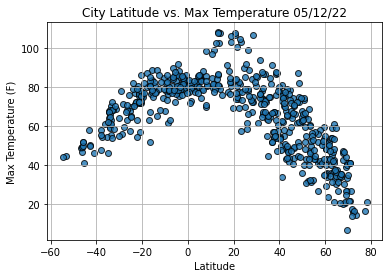

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

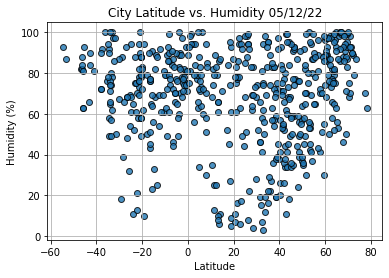

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()